In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:

import gym
import numpy as np
import matplotlib.pyplot as plt
from torch import nn 
from torchvision import models
import torch 
from rlxai.xai import ImageXAI
from rlxai.agent.actor_critic import A2C
env = gym.make("Breakout-v0")

In [116]:

actor = models.resnet18(pretrained=True)
actor.fc = nn.Linear(512, env.action_space.n)
critic = models.resnet18(pretrained=True)
critic.fc = nn.Linear(512, 1)
A2C_MODEL = A2C(actor=actor,critic=critic,lr=1e-3)
A2C_MODEL.load_model("./")
model=A2C_MODEL.actor

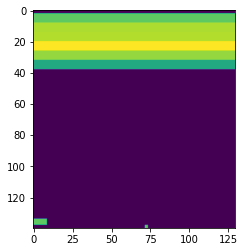

In [117]:

def img_crop(img_arr) :
    return img_arr[55:-15,15:-15,:]
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])[:,:,np.newaxis]
def totensor(img_arr) :
    return torch.FloatTensor(img_arr.transpose((2, 0, 1))).unsqueeze(dim=0)
img_arr = env.render(mode="rgb_array")
plt.imshow(rgb2gray(img_crop(img_arr)))

In [118]:
img_arr = env.render(mode="rgb_array")
iteration = 0 
env.reset()
while True :
    img_arr,r,done,info = env.step(env.action_space.sample())
    if iteration == 100 :
        break 
    else :
        iteration += 1 

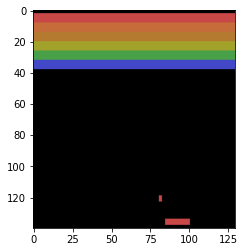

In [120]:
plt.imshow(img_crop(img_arr))

In [121]:

def data_transform(x) :
    # x = img_crop(x)
    # x = rgb2gray(x)
    # print(x.shape)
    x = totensor(x)
    return x
target2idx = {"0":0,"1":1,"2":2,"3":3}

xai = ImageXAI(model ,  target2idx , data_transform)

In [126]:
xai(img_crop(img_arr) , "0")

run...
classify...
run for xai...
Approximation delta:  tensor([0.0062], dtype=torch.float64)


In [127]:
folder_dir = "./result"
from pathlib import Path
ResultDir = Path(folder_dir)
ResultDir.mkdir(exist_ok=True)

In [128]:
xai.showResult(save_path=ResultDir.joinpath("./Result.png"))

{0: '0', 1: '1', 2: '2', 3: '3'}
probability :  tensor([[5.1550e-04, 5.6467e-03, 9.9317e-01, 6.6847e-04]],
       grad_fn=<SoftmaxBackward>)


In [129]:
xai.show_integrated_gradients(save_folder=ResultDir)
xai.plot_Occlusion(save_path=ResultDir.joinpath("./Occlusion.png"))
xai.plot_InputXGradient(target=1, save_path=ResultDir.joinpath("./InputXGradeint.png"))
xai.plot_InputXGradient_all_target(save_path=ResultDir.joinpath("./InputXGradeint_ALL.png"))
xai.plot_GuidedBackprop_all_target(n_row=2, save_path=ResultDir.joinpath("./GuideBackprop.png"))
xai.plot_IntegratedGradients_Black(save_path=ResultDir.joinpath("./IntegratedGradients_Black.png"))

Predicted: 2  Probability: tensor([[5.1550e-04, 5.6467e-03, 9.9317e-01, 6.6847e-04]],
       grad_fn=<SoftmaxBackward>)
step1
step2
step3
step4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: axes don't match array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


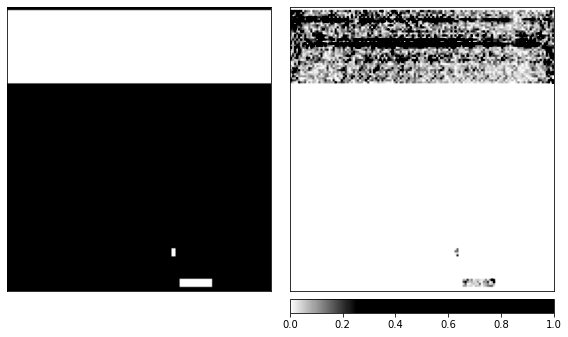

Lime attribution: 100%|██████████| 3/3 [00:22<00:00,  7.67s/it]


In [131]:
xai.plot_IntegratedGradients_NoiseTunnel(save_path=ResultDir.joinpath("./IntegratedGradients_NoiseTunnel.png"))
xai.plot_GradientShap(save_path=ResultDir.joinpath("./GradientShap.png"))
xai.plot_LRLIME(save_path=ResultDir.joinpath("./LRLIME.png"))